# <center> 👉 class_09_3 » _Hough Line & Circle Detection / Transformation_ </center>  

## ▶ Hough Transform  

The Hough transform can be used to __recognize various shapes in images, such as straight lines or circles.__
Here we will learn about functions that detect straight lines and circles.
For a detailed theoretical explanation of Hough transform, please refer to the opencv document or Wikipedia.

## ● Hough Line Transform (Detection)  

Images are made up of many pixels.
The key to Hough line transformation is to __select only those pixels that have a linear relationship with each other.__
OpenCV provides the following functions for Hough transform.

<img src='./images/practice_img/lens1.png' width=200 height=200>  

- **lines = cv2.HoughLines(img, $r$, $θ$, threshold, lines, srn=0, stn=0, min_theta, max_theta)**
>- img: input img, 1 ch binary scale
>>- Uses grayscale image (gray) and Canny edge image (canny)    
>>- The threshold values of the Canny edge algorithm are 5000 and 1500, respectively, leaving only significant edges.  
>>- The kernel uses a size of 5 and an L2 gradient of True.
>- $r$ : Distance measurement resolution 거리 측정 해상도, 0~1
>- $θ$ : angle radian 각도, 라디안 단위 (np.pi/0~180)
>- threshold: Minimum equal number to be judged by a straight line 직선으로 판단할 최소한의 동일 개수   
>>- Small values: decreased accuracy, increased number of detections. 작은 값: 정확도 감소, 검출 개수 증가    
>>- Larger values: increased accuracy, reduced number of detections.큰 값: 정확도 증가, 검출 개수 감소
>- lines: result, N x 1 x 2 배열  $(r,θ)$
>- srn, stn: Used for multi-scale Hough transform, not used for line detection 멀티 스케일 허프 변환에 사용, 선 검출에서는 사용 안 함
>- min_theta, max_theta: Maximum and minimum angles to use for detection 검출을 위해 사용할 최대, 최소 각도  

- The  $(r,θ)$ parameters can be used to __control how precisely distances and angles are calculated.__
- Threshold refers to __the minimum number of points that must appear on the same straight line to judge it as a straight line.__

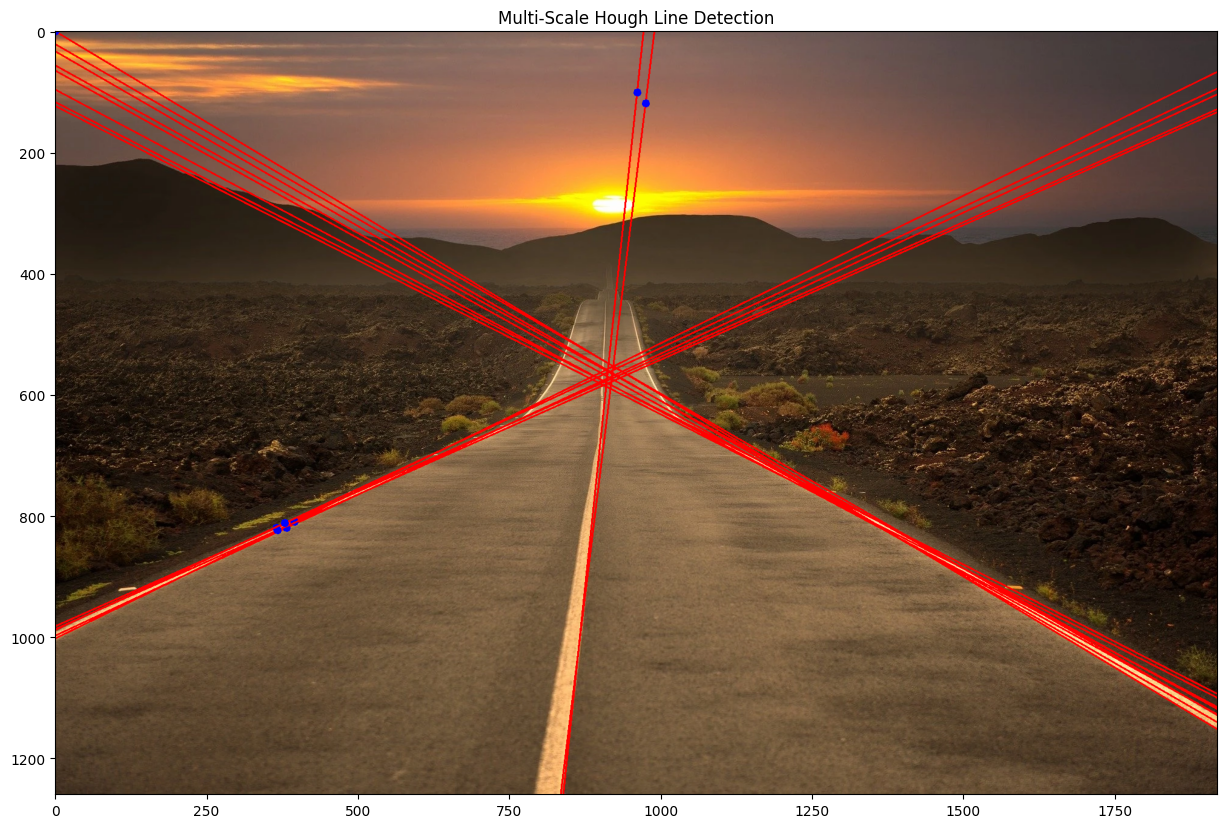

In [2]:
import numpy as np
import cv2

src = cv2.imread("./images/practice_img/hough1.webp")
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 5000, 1500, apertureSize = 5, L2gradient = True)
lines = cv2.HoughLines(canny, 0.8, np.pi / 180, 150, srn = 100, stn = 200, min_theta = 0, max_theta = np.pi)

for i in lines:
    rho, theta = i[0][0], i[0][1]
    a, b = np.cos(theta), np.sin(theta)   # Trigonometric ratio for x and y axes
    x0, y0 = int(a*rho), int(b*rho)     # x, y reference (intercept) coordinates
                                        # Calculate starting and ending points for drawing with straight line equations
    scale = src.shape[0] + src.shape[1]
    x1 = int(x0 + scale * -b)          
    y1 = int(y0 + scale * a)
    x2 = int(x0 - scale * -b)
    y2 = int(y0 - scale * a)

    cv2.line(dst, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.circle(dst, (x0, y0), 3, (255, 0, 0), 5, cv2.FILLED)

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.axis('on'),plt.title('Multi-Scale Hough Line Detection')
plt.show()

In [3]:
# Hough Line Detection (hough_line.py)
import cv2
import numpy as np

img = cv2.imread('./images/practice_img/sudoku.jpg')
img2 = img.copy()
h, w = img.shape[:2]
# print(img.shape,h,w)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
edges = cv2.Canny(imgray, 100, 200 ) 
# edges = cv2.Canny(gray,100,200,apertureSize = 3)
cv2.imshow('edges',edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

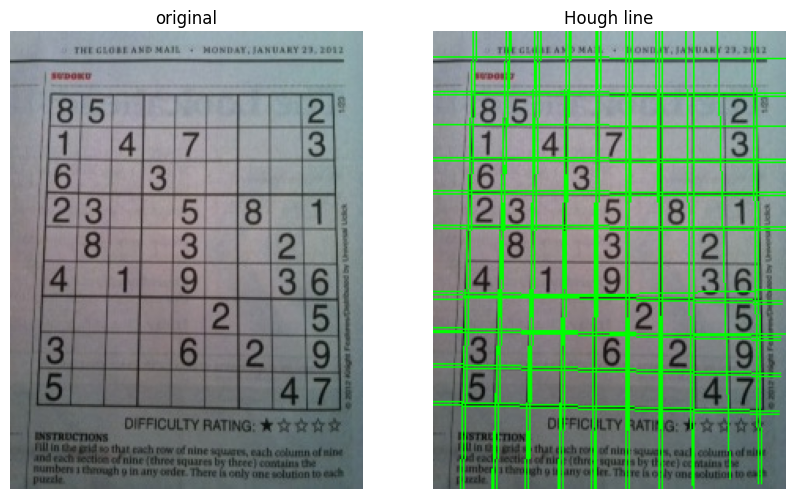

In [4]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 130) 

for line in lines: 
    r,theta = line[0] 
    tx, ty = np.cos(theta), np.sin(theta) 
    x0, y0= tx*r, ty*r                    
#     print(abs(x0), abs(y0))
#     cv2.circle(img2, (abs(x0), abs(y0)), 3, (0,0,255), -1) 
    
    
    x1, y1 = int(x0 + w*(-ty)), int(y0 + h * tx)   
    x2, y2 = int(x0 - w*(-ty)), int(y0 - h * tx)
    cv2.line(img2, (x1, y1), (x2, y2), (0,255,0), 1) 

merged = np.hstack((img, img2))
cv2.imshow('hough line', merged)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Hough line')

plt.show()

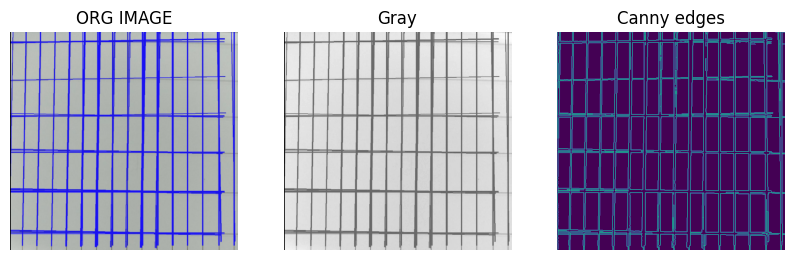

In [1]:
# Python program to illustrate HoughLine method for line detection
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./images/linesDetected.png', -1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

fig, axs = plt.subplots(1,3,figsize=(10,10))
axs[0].imshow(img), axs[0].axis('off'), axs[0].set_title('ORG IMAGE')
axs[1].imshow(gray, cmap='gray'), axs[1].axis('off'), axs[1].set_title('Gray')
axs[2].imshow(edges), axs[2].axis('off'), axs[2].set_title('Canny edges')
# axs[3].imshow(lines), axs[3].axis('off'), axs[3].set_title('HoughLines')

plt.show() 

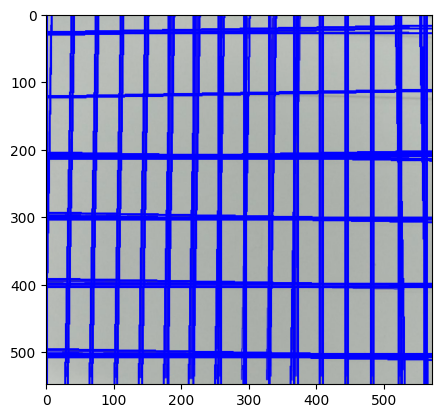

In [2]:
# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 200) 

# The below for loop runs till r and theta values are in the range of the 2d array
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
  
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
# cv2.imwrite('linesDetected.jpg', img)
plt.imshow(img)
plt.show() 

## ● (Progressive) Probabilistic Hough Transform  

Hough line detection requires a lot of computation because it finds straight lines by drawing numerous lines for all points.
A method to improve this is the Probabilistic Hough line transform.
This is a method of performing Hough transform on randomly selected pixels without considering all points and gradually increasing the number.
You can perform a Probabilistic Hough line transform with the following functions:  
    
허프 선 검출은 모든 점에 대해 수많은 선을 그어서 직선을 찾기 때문에 연산량이 무척 많습니다.   
이를 개선하기 위한 방법이 확률적 허프 선 변환입니다.   
이는 모든 점을 고려하지 않고 무작위로 선정한 픽셀에 대해 허프 변환을 수행하고 점차 그 수를 증가시키는 방법입니다.   
다음의 함수로 확률적 허프 선 변환을 수행할 수 있습니다.

- **lines = cv2.HoughLinesP(img, rho, theta, threshold, lines, minLineLength, maxLineGap)**  

>- minLineLength(optional): Minimum length to be accepted as a line 선으로 인정할 최소 길이
>- axLineGap(optional): Maximum spacing to be judged by a line 선으로 판단할 최대 간격
>- lines: Detected line coordinates 검출된 선 좌표, N x 1 x 4  (x1, y1, x2, y2)

The detection result of cv2.HoughLines() is $r, θ$, but the detection result of cv2.HoughLinesP() is __the start and end coordinates of the line.__  
- Since this detects lines probabilistically, it naturally detects fewer lines than cv2.HoughLines().  
- Therefore, you need to make the edges stronger and set the threshold low.  

cv2.HoughLines()의 검출 결과는 $r, θ$ 이지만 cv2.HoughLinesP()의 검출 결과는 선의 시작과 끝 좌표입니다.   
이는 확률적으로 선을 검출하므로 당연히 cv2.HoughLines()보다 선 검출이 적습니다.   
따라서 엣지를 강하게 하고 threshold를 낮게 지정해주어야 합니다.

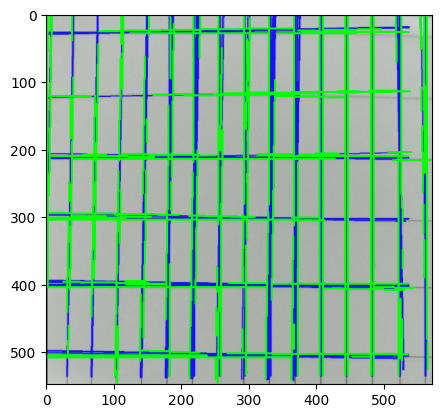

In [3]:
# Apply HoughLinesP method to directly obtain line end points
import cv2
import numpy as np
  
image = cv2.imread('./images/linesDetected.png',-1)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize=3)

lines_list =[]
lines = cv2.HoughLinesP(
            edges,             # Input edge image
            1,                 # Distance resolution in pixels
            np.pi/180,         # Angle resolution in radians
            threshold=100,     # Min number of votes for valid line
            minLineLength=5,   # Min allowed length of line
            maxLineGap=10      # Max allowed gap between line for joining them
            )
  

for points in lines:                             # Iterate over points
    x1,y1,x2,y2=points[0]                        # Extracted points nested in the list
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)  # Draw the lines joing the points  On the original image
    lines_list.append([(x1,y1),(x2,y2)])
      
# cv2.imwrite('detectedLines.png',image)
plt.imshow(image)
plt.show() 

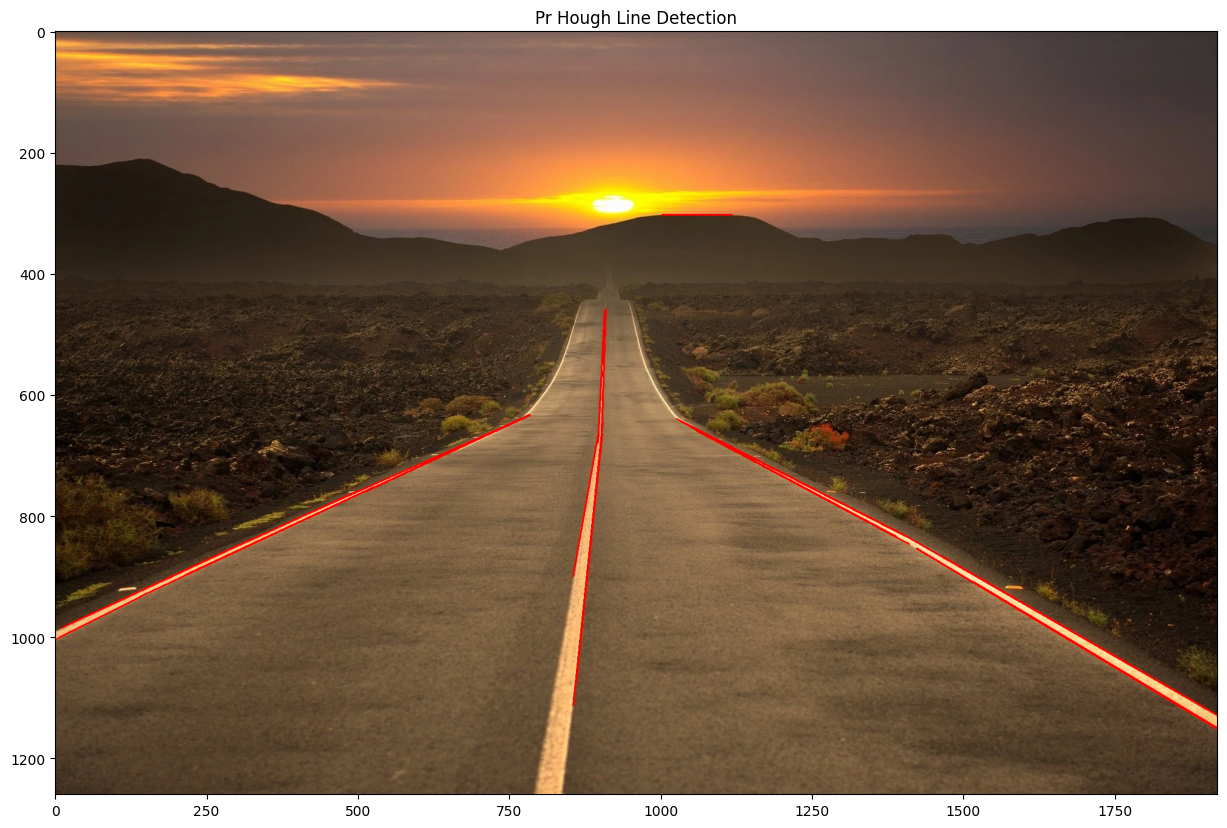

In [6]:
import numpy as np
import cv2

src = cv2.imread("./images/practice_img/hough1.webp")
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 5000, 1500, apertureSize = 5, L2gradient = True)
lines = cv2.HoughLinesP(canny, 0.8, np.pi / 180, 90, minLineLength = 10, maxLineGap = 100)

for i in lines:
    cv2.line(dst, (int(i[0][0]), int(i[0][1])), (int(i[0][2]), int(i[0][3])), (0, 0, 255), 2)

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.axis('on'),plt.title('Pr Hough Line Detection')
plt.show()

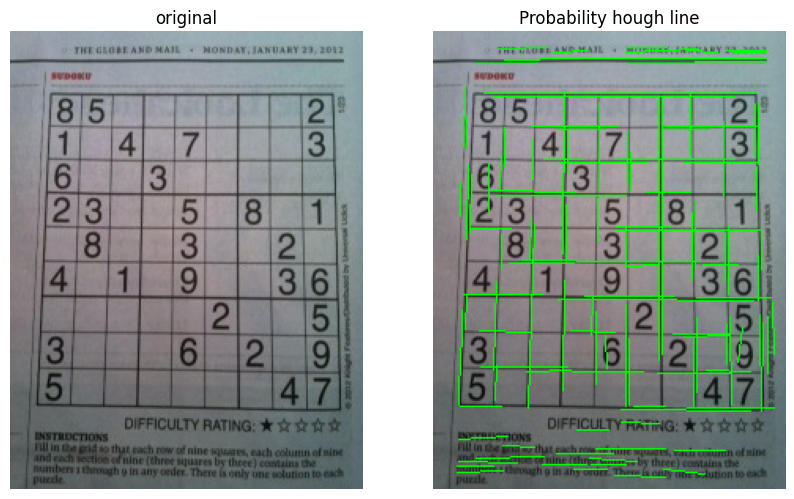

In [7]:
# hough_lineP.py

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/sudoku.jpg')
img2 = img.copy()
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgray, 50, 200 )

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, None, 20, 2)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img2, (x1,y1), (x2, y2), (0,255,0), 1)

merged = np.hstack((img, img2))
cv2.imshow('Probability hough line', merged)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Probability hough line')

plt.show()

## ● Hough Circle Transform  

Circle detection finds a variety of uses in biomedical applications, ranging from iris detection to white blood cell segmentation.   

The circle detection algorithm also detects circles using the Hough Circle Transform algorithm, one of the Hough transform algorithms.
The Hough circle transform algorithm operates in a similar way to the Hough line transform algorithm we learned earlier.
- The Hough circle transform algorithm detects with a three-dimensional accumulation plane rather than a two-dimensional one.
- Each dimension uses the circle's center point x, the circle's center y, and the circle's radius r to form an accumulation plane.
- The accumulation plane transforms from two-dimensional space (x, y) to three-dimensional space (a, b, r).
- The way the Hough Circle Transform works is to detect edges in an image.

원 감지는 홍채 감지부터 백혈구 분할에 이르기까지 생의학 응용 분야에서 다양한 용도로 사용됩니다.

원 검출 알고리즘도 허프 변환 알고리즘 중 하나인 허프 원 변환(Hough Circle Transform) 알고리즘을 활용해 원을 검출합니다.  
- 허프 원 변환 알고리즘은 앞서 배운 허프 선 변환 알고리즘과 비슷한 방식으로 동작합니다.  
- 허프 원 변환 알고리즘은 2차원이 아닌 3차원 누산 평면으로 검출합니다.  
- 각 차원은 원의 중심점 x, 원의 중심점 y, 원의 반경 r을 활용해 누산 평면을 구성합니다.  
- 누산 평면은 2차원 공간(x, y)에서 3차원 공간(a, b, r)으로 변환됩니다.  
- 허프 원 변환의 동작 방식은 이미지에서 가장자리를 검출합니다. 

<img src='./images/practice_img/hough4.webp'  width=600 height=200>

The OpenCV circle detection function detects circles using the Two stage Hough Transform method.  
- First, select a 2D histogram for the center point (a, b) of the circle using the gradient method on the edges.
- Increments all points in the accumulation plane along a line segment of the gradient from minimum distance to maximum distance for every point.
- Additionally, to select the center point, a point from the center point candidate group that is larger than the threshold value and larger than adjacent points is used as the center point.
- The coordinates of the selected center point (a, b) and edges are substituted into the circle equation to determine a one-dimensional histogram of radius r.
- The memory required for the histogram is reduced, so if the length of the longest side in the image is N, $ N^2 + N $ bytes of memory are required.  

OpenCV 원 검출 함수는 2단계 허프 변환(Two stage Hough Transform) 방법을 활용해 원을 검출합니다.  
- 먼저 가장자리에 그레이디언트 방법을 이용해 원의 중심점(a, b)에 대한 2차원 히스토그램을 선정합니다.  
- 모든 점에 대해 최소 거리에서 최대 거리까지 기울기의 선분을 따라 누산 평면의 모든 점을 증가시킵니다.  
- 또한 중심점을 선택하기 위해 중심점 후보군에서 임곗값보다 크고 인접한 점보다 큰 점을 중심점으로 사용합니다.  
- 선정된 중심점(a, b)와 가장자리의 좌표를 원의 방정식에 대입해 반지름 r의 1차원 히스토그램으로 판단하게 됩니다.  
- 히스토그램에 필요한 메모리가 줄어들어 이미지에서 가장 긴 변의 길이가 N이라면 $ N^2 + N $ 바이트의 메모리를 필요로 합니다.


- **circle = cv2.HoughCircles(img, method, dp, minDist, circles, param1, param2, minRadius, maxRadius)**      

>- **circles = cv2.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8, param1=100, param2=30, minRadius=1, maxRadius=30)**

>- gray: Input image (grayscale).
>- circles: A vector that stores sets of 3 values: xc,yc,r for each detected circle.
>- HOUGH_GRADIENT: Define the detection method. Currently this is the only one available in OpenCV.
>- dp = 1: The inverse ratio of resolution.
>>- The dp value must be found empirically by gradually increasing it.    
>- min_dist = gray.rows/16: Minimum distance between detected centers.
>- param_1 = 200: Upper threshold for the internal Canny edge detector.
>- param_2 = 30*: Threshold for center detection.
>- min_radius = 0: Minimum radius to be detected. If unknown, put zero as default.
>- max_radius = 0: Maximum radius to be detected. If unknown, put zero as default.  

        - img: 입력 이미지, 1채널 배열
        - method: 검출 방식 선택 (현재 cv2.HOUGH_GRADIENT만 가능)
        - dp: 입력 영상과 경사 누적의 해상도 반비례율, 1: 입력과 동일, 값이 커질수록 부정확
        - minDist: 원들 중심 간의 최소 거리 (0: 에러, 0이면 동심원이 검출 불가하므로)
        - circles(optional): 검출 원 결과, N x 1 x 3 부동 소수점 배열 (x, y, 반지름)
        - param1(optional): 캐니 엣지에 전달할 스레시홀드 최대 값 (최소 값은 최대 값의 2배 작은 값을 전달)
        - param2(optional): 경사도 누적 경계 값 (값이 작을수록 잘못된 원 검출)
        - minRadius, maxRadius(optional): 원의 최소 반지름, 최대 반지름 (0이면 이미지 전체의 크기)

        cv2.HoughCircles는 캐니 엣지를 수행하고 나서 소벨 필터를 적용해 엣지의 경사도(gradient)를 누적하는 방법으로 원 검출을 구현했습니다.   
        그래서 캐니 엣지 및 경사도 누적에 대한 파라미터(param1, param2)가 있는 것입니다.

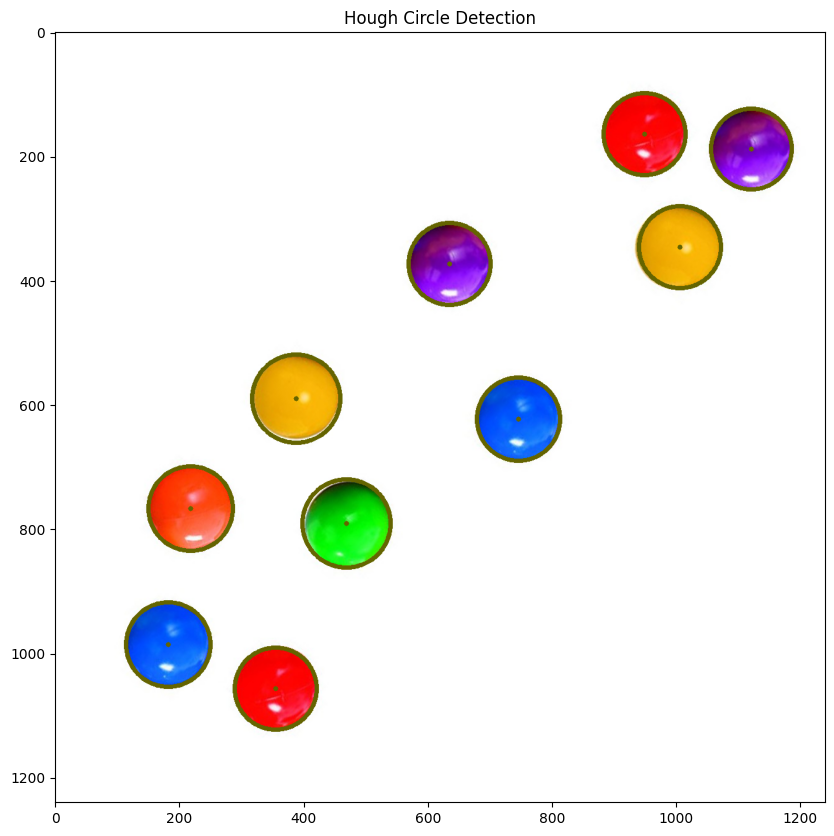

In [54]:
import cv2

src = cv2.imread("./images/practice_img/hough4.jpg")
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
 
blur = cv2.medianBlur(gray, 5)    # Reduce the noise to avoid false circle detection
rows = gray.shape[0]
# circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, rows / 8, param1=50, param2=30, minRadius=0, maxRadius=0)
# circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 100, param1 = 250, param2 = 10, minRadius = 8, maxRadius = 20)
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.5, 30, None, 200) # dp=1.2, minDist=30, cany_max=200 

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        cv2.circle(src, center, 1, (0, 100, 100), 5)   # circle center
        radius = i[2]
        cv2.circle(src, center, radius, (0, 100, 100), 5)   # circle outline

cv2.imshow("dst", src)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)),plt.axis('on'),plt.title('Hough Circle Detection')
plt.show()

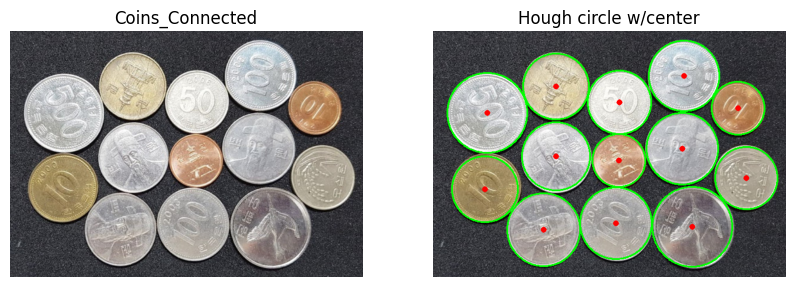

In [14]:
# hough_circle.py

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/coins_connected.jpg')
img_org = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

blur = cv2.GaussianBlur(gray, (3,3), 0) 

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 30, None, 200) # dp=1.2, minDist=30, cany_max=200 
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(img,(i[0], i[1]), i[2], (0, 255, 0), 2) 
        cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 5) 

cv2.imshow('hough circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('Coins_Connected')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Hough circle w/center')

plt.show()

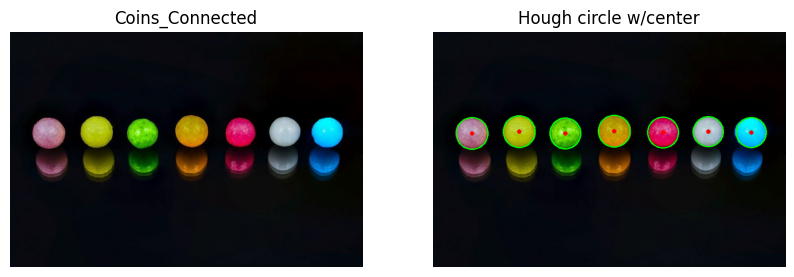

In [57]:
# hough_circle.py

import cv2
import numpy as np

img = cv2.imread('./images/practice_img/hough3.jpg')
img_org = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

blur = cv2.GaussianBlur(gray, (3,3), 0) 

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.8, 30, None, 200) # dp=1.2, minDist=30, cany_max=200 
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(img,(i[0], i[1]), i[2], (0, 255, 0), 2) 
        cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 5) 

cv2.imshow('hough circle', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('Coins_Connected')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('Hough circle w/center')

plt.show()

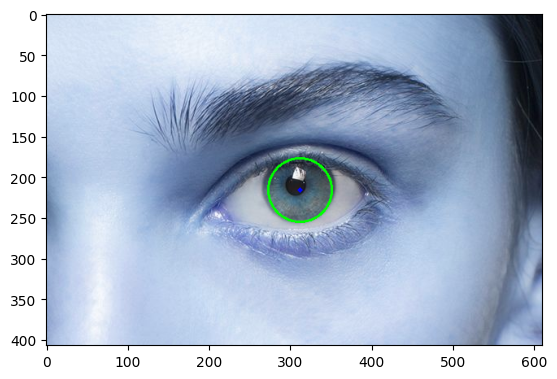

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read image.
img = cv2.imread('./images/circle-detection.jpg', cv2.IMREAD_COLOR)
  
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
                   param2 = 30, minRadius = 1, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :1]: # [0, :] for all circles
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
#         cv2.imshow("Detected Circle", img)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
        plt.imshow(img)
        plt.show() 